In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from keras.datasets import mnist
from keras.datasets import boston_housing

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input

from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

# Problem 1: 

Consider the MNIST dataset from keras package. It contains a training set of 60,000 28x28 grayscale images of 10 handwritten digits (from 0 to 9), along with a test set of 10,000 images. We would like to build a feedforward neural network model to identify the digit on the image. This is a multiclass classification problem with 10 output classes. For fitting the model below, use ReLU activation for the hidden layers, softmax activation for the output layer, and minibatches of size 128.
 128.
(a) Fit a neural network model with 1 hidden layer with 512 hidden units and 5 epochs.
Report its training and test errors.
(b) Repeat (a) with 1 hidden layer with 512 hidden units and 10 epochs.
(c) Repeat (a) with 1 hidden layer with 256 hidden units and 5 epochs.
(d) Repeat (a) with 1 hidden layer with 256 hidden units and 10 epochs.
(e) Repeat (a) with 2 hidden layers, each with 512 hidden units, and 5 epochs.
(f) Repeat (a) with 2 hidden layers, each with 512 hidden units, and 10 epochs.
(g) Repeat (a) with 2 hidden layers, each with 256 hidden units, and 5 epochs.
(h) Repeat (a) with 2 hidden layers, each with 256 hidden units, and 10 epochs.
(i) Repeat (a) with L2 weight regularization with = 0001.
(j) Repeat (a) with 50% dropout.
(k) Make a tabular summary of the results from all the above models and compare them.
Which model would you recommend?

### (a) Fit a neural network model with 1 hidden layer with 512 units and 5 epochs. Report its training and test errors.

In [5]:
## loading in the MNIST dataset:
data = mnist.load_data()

## splitting the data directly into training and testing
(x_train, y_train), (x_test, y_test) = data

In [6]:
## verifying the shape of the first image
x_train[0].shape

## verifying that training and test data are the correct size
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
## reshaping each image so that every pixel of the images can be accessed
x_train = x_train.reshape((x_train.shape[0], 28*28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28*28)).astype('float32') / 255

In [12]:
## one-hot encoding labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print("y_train shape:", y_train.shape)  # Should be (60000, 10)
print("y_test shape:", y_test.shape)    # Should be (10000, 10)

y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [14]:
# building the model with 1 hidden layer with 512 nodes and 5 epochs
model_a = Sequential()
model_a.add(Input(shape = (28*28,)))
model_a.add(Dense(512, activation = 'relu')) # 1 hidden layer with 512 units
model_a.add(Dense(10, activation = 'softmax')) # output layer with 10 different classes (for digits 0 to 9)

## compiling the model
model_a.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
## training the neural network with minibatch size 128 and 5 epochs
history_a = model_a.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 128, verbose = 1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8635 - loss: 0.4739 - val_accuracy: 0.9578 - val_loss: 0.1409
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9645 - loss: 0.1226 - val_accuracy: 0.9707 - val_loss: 0.0938
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9797 - loss: 0.0725 - val_accuracy: 0.9745 - val_loss: 0.0804
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9857 - loss: 0.0508 - val_accuracy: 0.9762 - val_loss: 0.0752
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9900 - loss: 0.0362 - val_accuracy: 0.9789 - val_loss: 0.0670


In [18]:
## evaluating model performance on training and test data
test_loss_a, test_accuracy_a = model_a.evaluate(x_test, y_test)
print(f"Test Accuracy for Neural Network (a): {test_accuracy_a:.4f}")
print(f"Test Loss for Neural Network (a): {test_loss_a:.4f}")

train_loss_a, train_accuracy_a = model_a.evaluate(x_train, y_train)
print(f"Training Accuracy for Neural Network (a): {train_accuracy_a:.4f}")
print(f"Training Loss for Neural Network (a): {train_loss_a:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.9760 - loss: 0.0757
Test Accuracy for Neural Network (a): 0.9789
Test Loss for Neural Network (a): 0.0670
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.9927 - loss: 0.0297
Training Accuracy for Neural Network (a): 0.9925
Training Loss for Neural Network (a): 0.0291


### (b) Repeat (a) with 1 hidden layer with 512 hidden units and 10 epochs.

In [21]:
# building the model with 1 hidden layer with 512 nodes and 10 epochs
model_b = Sequential()
model_b.add(Input(shape = (28*28,)))
model_b.add(Dense(512, activation = 'relu')) # 1 hidden layer with 512 units
model_b.add(Dense(10, activation = 'softmax')) # output layer with 10 different classes (for digits 0 to 9)

## compiling the model
model_b.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
## training the neural network with minibatch size 128 and 10 epochs
history_b = model_b.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 128, verbose = 1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8728 - loss: 0.4552 - val_accuracy: 0.9614 - val_loss: 0.1319
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9666 - loss: 0.1174 - val_accuracy: 0.9695 - val_loss: 0.1058
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9790 - loss: 0.0741 - val_accuracy: 0.9737 - val_loss: 0.0829
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9852 - loss: 0.0540 - val_accuracy: 0.9783 - val_loss: 0.0700
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9893 - loss: 0.0375 - val_accuracy: 0.9798 - val_loss: 0.0668
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9928 - loss: 0.0266 - val_accuracy: 0.9806 - val_loss: 0.0667
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9948 - loss: 0.0200 - val_accuracy: 0.9805 - val_loss: 0.0662
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9965 - loss: 0.0154 - val_accuracy: 0.

In [25]:
## evaluating model performance on training and test data
test_loss_b, test_accuracy_b = model_b.evaluate(x_test, y_test)
print(f"Test Accuracy for Neural Network (b): {test_accuracy_b:.4f}")
print(f"Test Loss for Neural Network (b): {test_loss_b:.4f}")

train_loss_b, train_accuracy_b = model_b.evaluate(x_train, y_train)
print(f"Training Accuracy for Neural Network (b): {train_accuracy_b:.4f}")
print(f"Training Loss for Neural Network (b): {train_loss_b:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.9782 - loss: 0.0733
Test Accuracy for Neural Network (b): 0.9811
Test Loss for Neural Network (b): 0.0604
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.9995 - loss: 0.0050
Training Accuracy for Neural Network (b): 0.9994
Training Loss for Neural Network (b): 0.0051


### (c) Repeat (a) with 1 hidden layer with 256 hidden units and 5 epochs. 

In [28]:
# building the model with 1 hidden layer with 256 nodes and 5 epochs
model_c = Sequential()
model_c.add(Input(shape = (28*28,)))
model_c.add(Dense(256, activation = 'relu')) # 1 hidden layer with 256 units
model_c.add(Dense(10, activation = 'softmax')) # output layer with 10 different classes (for digits 0 to 9)

## compiling the model
model_c.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
## training the neural network with minibatch size 128 and 5 epochs
history_c = model_c.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 128, verbose = 1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8487 - loss: 0.5408 - val_accuracy: 0.9503 - val_loss: 0.1663
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9585 - loss: 0.1490 - val_accuracy: 0.9668 - val_loss: 0.1131
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0958 - val_accuracy: 0.9727 - val_loss: 0.0908
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9796 - loss: 0.0710 - val_accuracy: 0.9757 - val_loss: 0.0814
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9850 - loss: 0.0522 - val_accuracy: 0.9757 - val_loss: 0.0792


In [32]:
## evaluating model performance on training and test data
test_loss_c, test_accuracy_c = model_c.evaluate(x_test, y_test)
print(f"Test Accuracy for Neural Network (c): {test_accuracy_c:.4f}")
print(f"Test Loss for Neural Network (c): {test_loss_c:.4f}")

train_loss_c, train_accuracy_c = model_c.evaluate(x_train, y_train)
print(f"Training Accuracy for Neural Network (c): {train_accuracy_c:.4f}")
print(f"Training Loss for Neural Network (c): {train_loss_c:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.9731 - loss: 0.0924
Test Accuracy for Neural Network (c): 0.9757
Test Loss for Neural Network (c): 0.0792
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.9889 - loss: 0.0414
Training Accuracy for Neural Network (c): 0.9888
Training Loss for Neural Network (c): 0.0413


### (d) Repeat (a) with 1 hidden layer with 256 hidden units and 10 epochs.

In [35]:
# building the model with 1 hidden layer with 256 nodes and 10 epochs
model_d = Sequential()
model_d.add(Input(shape = (28*28,)))
model_d.add(Dense(256, activation = 'relu')) # 1 hidden layer with 256 units
model_d.add(Dense(10, activation = 'softmax')) # output layer with 10 different classes (for digits 0 to 9)

## compiling the model
model_d.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
## training the neural network with minibatch size 128 and 10 epochs
history_d = model_d.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 128, verbose = 1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8539 - loss: 0.5315 - val_accuracy: 0.9545 - val_loss: 0.1580
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9576 - loss: 0.1460 - val_accuracy: 0.9667 - val_loss: 0.1108
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.0921 - val_accuracy: 0.9744 - val_loss: 0.0880
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9805 - loss: 0.0676 - val_accuracy: 0.9756 - val_loss: 0.0787
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9868 - loss: 0.0480 - val_accuracy: 0.9771 - val_loss: 0.0742
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0382 - val_accuracy: 0.9777 - val_loss: 0.0750
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9921 - loss: 0.0299 - val_accuracy: 0.9785 - val_loss: 0.0651
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9939 - loss: 0.0236 - val_accuracy: 0.

In [39]:
## evaluating model performance on training and test data
test_loss_d, test_accuracy_d = model_d.evaluate(x_test, y_test)
print(f"Test Accuracy for Neural Network (d): {test_accuracy_d:.4f}")
print(f"Test Loss for Neural Network (d): {test_loss_d:.4f}")

train_loss_d, train_accuracy_d = model_d.evaluate(x_train, y_train)
print(f"Training Accuracy for Neural Network (d): {train_accuracy_d:.4f}")
print(f"Training Loss for Neural Network (d): {train_loss_d:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.9764 - loss: 0.0839
Test Accuracy for Neural Network (d): 0.9804
Test Loss for Neural Network (d): 0.0692
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.9971 - loss: 0.0133
Training Accuracy for Neural Network (d): 0.9970
Training Loss for Neural Network (d): 0.0134


### (e) Repeat (a) with 2 hidden layers, each with 512 hidden units, and 5 epochs. 

In [42]:
# building the model with 2 hidden layers, each with 512 nodes and 5 epochs
model_e = Sequential()
model_e.add(Input(shape = (28*28,)))
model_e.add(Dense(512, activation = 'relu')) # 1st hidden layer with 512 units
model_e.add(Dense(512, activation = 'relu')) # 2nd hidden layer with 512 units
model_e.add(Dense(10, activation = 'softmax')) # output layer with 10 different classes (for digits 0 to 9)

## compiling the model
model_e.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [44]:
## training the neural network with minibatch size 128 and 5 epochs
history_e = model_e.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 128, verbose = 1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8827 - loss: 0.3993 - val_accuracy: 0.9654 - val_loss: 0.1119
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9747 - loss: 0.0816 - val_accuracy: 0.9742 - val_loss: 0.0805
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9850 - loss: 0.0459 - val_accuracy: 0.9779 - val_loss: 0.0722
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9886 - loss: 0.0353 - val_accuracy: 0.9756 - val_loss: 0.0814
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9919 - loss: 0.0255 - val_accuracy: 0.9804 - val_loss: 0.0692


In [46]:
## evaluating model performance on training and test data
test_loss_e, test_accuracy_e = model_e.evaluate(x_test, y_test)
print(f"Test Accuracy for Neural Network (e): {test_accuracy_e:.4f}")
print(f"Test Loss for Neural Network (e): {test_loss_e:.4f}")

train_loss_e, train_accuracy_e = model_e.evaluate(x_train, y_train)
print(f"Training Accuracy for Neural Network (e): {train_accuracy_e:.4f}")
print(f"Training Loss for Neural Network (e): {train_loss_e:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9779 - loss: 0.0823
Test Accuracy for Neural Network (e): 0.9804
Test Loss for Neural Network (e): 0.0692
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9944 - loss: 0.0166
Training Accuracy for Neural Network (e): 0.9951
Training Loss for Neural Network (e): 0.0157


### (f) Repeat (a) with 2 hidden layers, each with 512 hidden units, and 10 epochs.

In [49]:
# building the model with 2 hidden layers, each with 512 nodes and 10 epochs
model_f = Sequential()
model_f.add(Input(shape = (28*28,)))
model_f.add(Dense(512, activation = 'relu')) # 1st hidden layer with 512 units
model_f.add(Dense(512, activation = 'relu')) # 2nd hidden layer with 512 units
model_f.add(Dense(10, activation = 'softmax')) # output layer with 10 different classes (for digits 0 to 9)

## compiling the model
model_f.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [51]:
## training the neural network with minibatch size 128 and 10 epochs
history_f = model_f.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 128, verbose = 1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8885 - loss: 0.3919 - val_accuracy: 0.9568 - val_loss: 0.1427
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9754 - loss: 0.0781 - val_accuracy: 0.9748 - val_loss: 0.0788
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9844 - loss: 0.0489 - val_accuracy: 0.9760 - val_loss: 0.0776
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9888 - loss: 0.0338 - val_accuracy: 0.9767 - val_loss: 0.0796
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9932 - loss: 0.0223 - val_accuracy: 0.9804 - val_loss: 0.0702
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9943 - loss: 0.0181 - val_accuracy: 0.9785 - val_loss: 0.0715
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9935 - loss: 0.0188 - val_accuracy: 0.9753 - val_loss: 0.0945
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9950 - loss: 0.0156 - val_accuracy: 0.

In [53]:
## evaluating model performance on training and test data
test_loss_f, test_accuracy_f = model_f.evaluate(x_test, y_test)
print(f"Test Accuracy for Neural Network (f): {test_accuracy_f:.4f}")
print(f"Test Loss for Neural Network (f): {test_loss_f:.4f}")

train_loss_f, train_accuracy_f = model_f.evaluate(x_train, y_train)
print(f"Training Accuracy for Neural Network (f): {train_accuracy_f:.4f}")
print(f"Training Loss for Neural Network (f): {train_loss_f:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.9723 - loss: 0.1276
Test Accuracy for Neural Network (f): 0.9767
Test Loss for Neural Network (f): 0.1017
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.9929 - loss: 0.0204
Training Accuracy for Neural Network (f): 0.9926
Training Loss for Neural Network (f): 0.0215


### (g) Repeat (a) with 2 hidden layers, each with 256 hidden units, and 5 epochs.

In [56]:
# building the model with 2 hidden layers, each with 256 nodes and 5 epochs
model_g = Sequential()
model_g.add(Input(shape = (28*28,)))
model_g.add(Dense(256, activation = 'relu')) # 1st hidden layer with 256 units
model_g.add(Dense(256, activation = 'relu')) # 2nd hidden layer with 256 units
model_g.add(Dense(10, activation = 'softmax')) # output layer with 10 different classes (for digits 0 to 9)

## compiling the model
model_g.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [58]:
## training the neural network with minibatch size 128 and 5 epochs
history_g = model_g.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 128, verbose = 1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8570 - loss: 0.4965 - val_accuracy: 0.9626 - val_loss: 0.1249
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9674 - loss: 0.1079 - val_accuracy: 0.9735 - val_loss: 0.0853
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9802 - loss: 0.0636 - val_accuracy: 0.9758 - val_loss: 0.0758
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9866 - loss: 0.0440 - val_accuracy: 0.9770 - val_loss: 0.0751
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9886 - loss: 0.0333 - val_accuracy: 0.9796 - val_loss: 0.0686


In [60]:
## evaluating model performance on training and test data
test_loss_g, test_accuracy_g = model_g.evaluate(x_test, y_test)
print(f"Test Accuracy for Neural Network (g): {test_accuracy_g:.4f}")
print(f"Test Loss for Neural Network (g): {test_loss_g:.4f}")

train_loss_g, train_accuracy_g = model_g.evaluate(x_train, y_train)
print(f"Training Accuracy for Neural Network (g): {train_accuracy_g:.4f}")
print(f"Training Loss for Neural Network (g): {train_loss_g:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.9745 - loss: 0.0836
Test Accuracy for Neural Network (g): 0.9796
Test Loss for Neural Network (g): 0.0686
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.9940 - loss: 0.0199
Training Accuracy for Neural Network (g): 0.9937
Training Loss for Neural Network (g): 0.0203


### (h) Repeat (a) with 2 hidden layers, each with 256 hidden units, and 10 epochs.

In [63]:
# building the model with 2 hidden layers, each with 256 nodes and 10 epochs
model_h = Sequential()
model_h.add(Input(shape = (28*28,)))
model_h.add(Dense(256, activation = 'relu')) # 1st hidden layer with 256 units
model_h.add(Dense(256, activation = 'relu')) # 2nd hidden layer with 256 units
model_h.add(Dense(10, activation = 'softmax')) # output layer with 10 different classes (for digits 0 to 9)

## compiling the model
model_h.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [65]:
## training the neural network with minibatch size 128 and 10 epochs
history_h = model_h.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 128, verbose = 1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8589 - loss: 0.4903 - val_accuracy: 0.9606 - val_loss: 0.1275
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9680 - loss: 0.1064 - val_accuracy: 0.9712 - val_loss: 0.0917
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.0665 - val_accuracy: 0.9758 - val_loss: 0.0796
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0450 - val_accuracy: 0.9774 - val_loss: 0.0732
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9886 - loss: 0.0348 - val_accuracy: 0.9772 - val_loss: 0.0763
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9925 - loss: 0.0239 - val_accuracy: 0.9792 - val_loss: 0.0745
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9942 - loss: 0.0182 - val_accuracy: 0.9787 - val_loss: 0.0754
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9949 - loss: 0.0156 - val_accuracy: 0.

In [67]:
## evaluating model performance on training and test data
test_loss_h, test_accuracy_h = model_h.evaluate(x_test, y_test)
print(f"Test Accuracy for Neural Network (h): {test_accuracy_h:.4f}")
print(f"Test Loss for Neural Network (h): {test_loss_h:.4f}")

train_loss_h, train_accuracy_h = model_h.evaluate(x_train, y_train)
print(f"Training Accuracy for Neural Network (h): {train_accuracy_h:.4f}")
print(f"Training Loss for Neural Network (h): {train_loss_h:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.9731 - loss: 0.1088
Test Accuracy for Neural Network (h): 0.9782
Test Loss for Neural Network (h): 0.0893
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.9959 - loss: 0.0126
Training Accuracy for Neural Network (h): 0.9959
Training Loss for Neural Network (h): 0.0120


### (i) Repeat (a) with L2 weight regularization with = 0001.

In [70]:
# building the model with 1 hidden layer wiht 512 nodes, 5 epochs, and l2 = 0.0001
model_i = Sequential()
model_i.add(Input(shape = (28*28,)))
model_i.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.0001))) # 1st hidden layer with 512 units
model_i.add(Dense(10, activation = 'softmax')) # output layer with 10 different classes (for digits 0 to 9)

## compiling the model
model_i.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [72]:
## training the neural network with minibatch size 128 and 5 epochs
history_i = model_i.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 128, verbose = 1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8740 - loss: 0.5082 - val_accuracy: 0.9602 - val_loss: 0.1803
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9664 - loss: 0.1618 - val_accuracy: 0.9704 - val_loss: 0.1411
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9769 - loss: 0.1229 - val_accuracy: 0.9729 - val_loss: 0.1262
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9830 - loss: 0.0997 - val_accuracy: 0.9784 - val_loss: 0.1130
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9849 - loss: 0.0911 - val_accuracy: 0.9770 - val_loss: 0.1088


In [74]:
## evaluating model performance on training and test data
test_loss_i, test_accuracy_i = model_i.evaluate(x_test, y_test)
print(f"Test Accuracy for Neural Network (i): {test_accuracy_i:.4f}")
print(f"Test Loss for Neural Network (i): {test_loss_i:.4f}")

train_loss_i, train_accuracy_i = model_i.evaluate(x_train, y_train)
print(f"Training Accuracy for Neural Network (i): {train_accuracy_i:.4f}")
print(f"Training Loss for Neural Network (i): {train_loss_i:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9725 - loss: 0.1209
Test Accuracy for Neural Network (i): 0.9770
Test Loss for Neural Network (i): 0.1088
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.9906 - loss: 0.0763
Training Accuracy for Neural Network (i): 0.9905
Training Loss for Neural Network (i): 0.0771


### (j) Repeat (a) with 50% dropout.

In [77]:
# building the model with 1 hidden layer wiht 512 nodes, 5 epochs, and 50% dropout
model_j = Sequential()
model_j.add(Input(shape = (28*28,)))
model_j.add(Dense(512, activation = 'relu')) # 1st hidden layer with 512 units
model_j.add(Dropout(0.5))
model_j.add(Dense(10, activation = 'softmax')) # output layer with 10 different classes (for digits 0 to 9)

## compiling the model
model_j.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [79]:
## training the neural network with minibatch size 128 and 5 epochs
history_j = model_j.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 128, verbose = 1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8382 - loss: 0.5442 - val_accuracy: 0.9547 - val_loss: 0.1547
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9517 - loss: 0.1651 - val_accuracy: 0.9665 - val_loss: 0.1095
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9638 - loss: 0.1261 - val_accuracy: 0.9729 - val_loss: 0.0860
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9707 - loss: 0.0985 - val_accuracy: 0.9766 - val_loss: 0.0739
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9757 - loss: 0.0806 - val_accuracy: 0.9774 - val_loss: 0.0720


In [81]:
## evaluating model performance on training and test data
test_loss_j, test_accuracy_j = model_j.evaluate(x_test, y_test)
print(f"Test Accuracy for Neural Network (j): {test_accuracy_j:.4f}")
print(f"Test Loss for Neural Network (j): {test_loss_j:.4f}")

train_loss_j, train_accuracy_j = model_j.evaluate(x_train, y_train)
print(f"Training Accuracy for Neural Network (j): {train_accuracy_j:.4f}")
print(f"Training Loss for Neural Network (j): {train_loss_j:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.9728 - loss: 0.0874
Test Accuracy for Neural Network (j): 0.9774
Test Loss for Neural Network (j): 0.0720
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.9869 - loss: 0.0459
Training Accuracy for Neural Network (j): 0.9863
Training Loss for Neural Network (j): 0.0464


### (k) Make a tabular summary of the results from all the above models and compare them. Which model would you recommend?

In [84]:
## creating the table of the data
table_data = {
    'Model Configuration': [
        '1 hidden layer, 512 units, 5 epochs',
        '1 hidden layer, 512 units, 10 epochs',
        '1 hidden layer, 256 units, 5 epochs',
        '1 hidden layer, 256 units, 10 epochs',
        '2 hidden layers, 512 units, 5 epochs',
        '2 hidden layers, 512 units, 10 epochs',
        '2 hidden layers, 256 units, 5 epochs',
        '2 hidden layers, 256 units, 10 epochs',
        'L2 regularization (λ = 0.0001)',
        '50% dropout'
    ],
    'Training Accuracy': [train_accuracy_a, train_accuracy_b, train_accuracy_c, train_accuracy_d, train_accuracy_e, train_accuracy_f,
                             train_accuracy_g, train_accuracy_h, train_accuracy_i, train_accuracy_j],
    'Training Loss': [train_loss_a, train_loss_b, train_loss_c, train_loss_d, train_loss_e, train_loss_f, train_loss_g, train_loss_h,
                     train_loss_i, train_loss_j],
    'Test Accuracy': [test_accuracy_a, test_accuracy_b, test_accuracy_c, test_accuracy_d, test_accuracy_e, test_accuracy_f, test_accuracy_g,
                     test_accuracy_h, test_accuracy_i, test_accuracy_j],
    'Test Loss': [test_loss_a, test_loss_b, test_loss_c, test_loss_d, test_loss_e, test_loss_f, test_loss_g, test_loss_h, test_loss_i, test_loss_j]
}

In [88]:
## creating a dataframe for the table so I can view it
results_df = pd.DataFrame(table_data)
results_df.head(10)

,Model Configuration,Training Accuracy,Training Loss,Test Accuracy,Test Loss
0,"1 hidden layer, 512 units, 5 epochs",0.992483,0.029070,0.9789,0.067011
1,"1 hidden layer, 512 units, 10 epochs",0.999350,0.005120,0.9811,0.060419
2,"1 hidden layer, 256 units, 5 epochs",0.988817,0.041314,0.9757,0.079170
3,"1 hidden layer, 256 units, 10 epochs",0.997000,0.013383,0.9804,0.069214
4,"2 hidden layers, 512 units, 5 epochs",0.995083,0.015680,0.9804,0.069196
5,"2 hidden layers, 512 units, 10 epochs",0.992583,0.021519,0.9767,0.101683
6,"2 hidden layers, 256 units, 5 epochs",0.993717,0.020278,0.9796,0.068634
7,"2 hidden layers, 256 units, 10 epochs",0.995933,0.011978,0.9782,0.089267
8,L2 regularization (λ = 0.0001),0.990450,0.077069,0.9770,0.108787
9,50% dropout,0.986283,0.046420,0.9774,0.072021


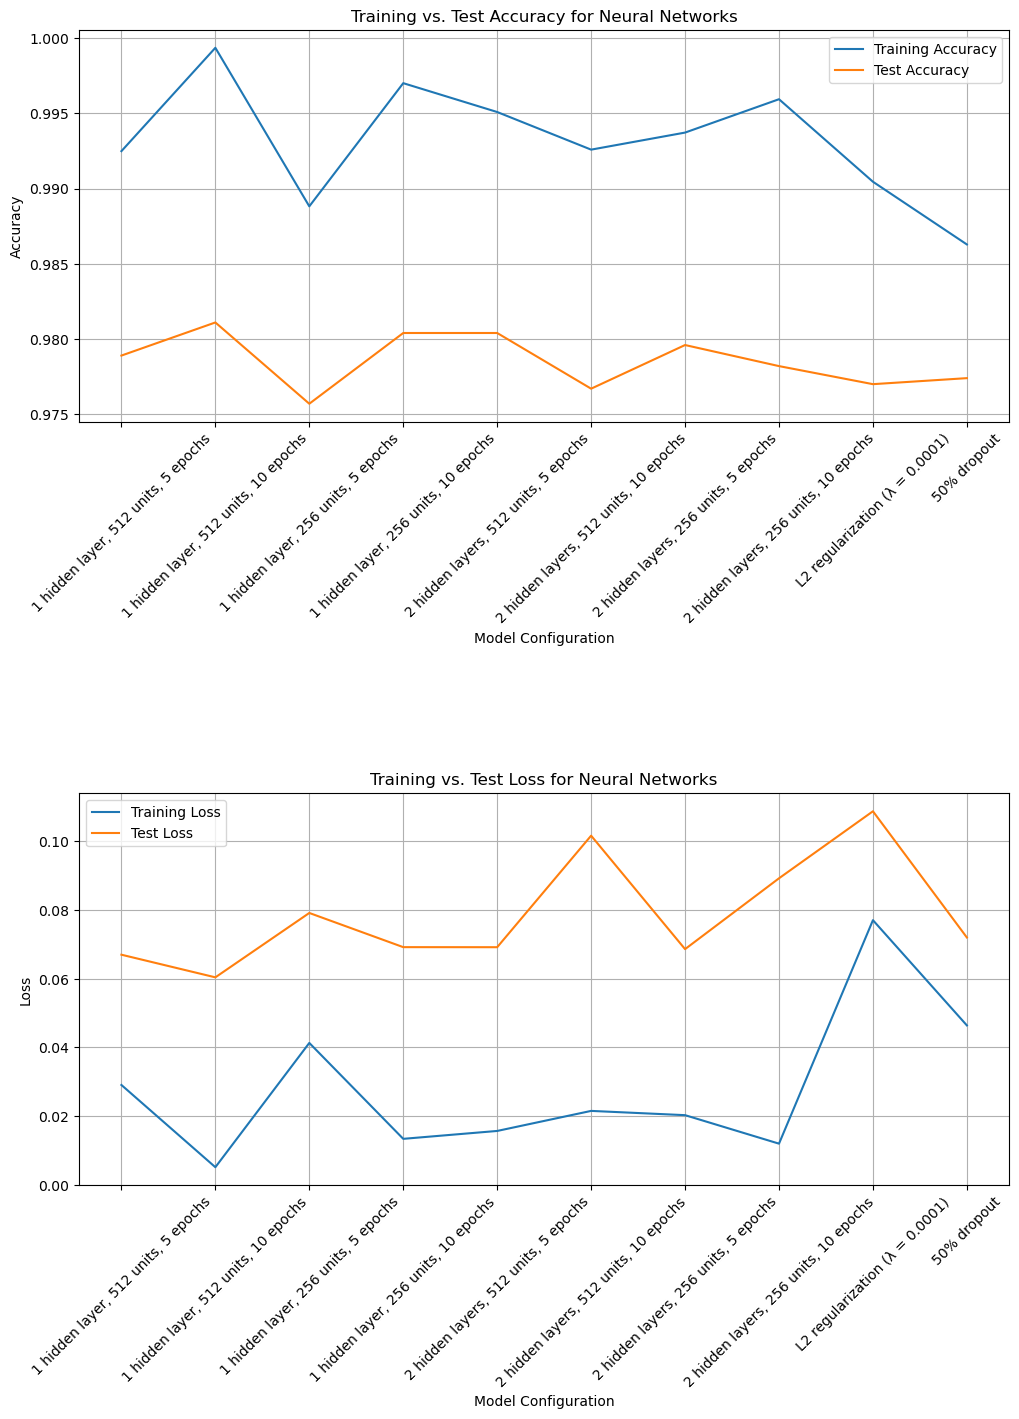

In [116]:
## visualizing accuracy and loss
fig, axs = plt.subplots(2, 1, figsize = (12, 15))

# Plot Training and Test Accuracy
axs[0].plot(results_df['Model Configuration'], results_df['Training Accuracy'], label = 'Training Accuracy')
axs[0].plot(results_df['Model Configuration'], results_df['Test Accuracy'], label = 'Test Accuracy')
axs[0].set_title('Training vs. Test Accuracy for Neural Networks')
axs[0].tick_params(axis = 'x', rotation = 45)
axs[0].set_xlabel('Model Configuration')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot Training and Test Loss
axs[1].plot(results_df['Model Configuration'], results_df['Training Loss'], label = 'Training Loss')
axs[1].plot(results_df['Model Configuration'], results_df['Test Loss'], label = 'Test Loss')
axs[1].set_title('Training vs. Test Loss for Neural Networks')
axs[1].tick_params(axis = 'x', rotation = 45)
axs[1].set_xlabel('Model Configuration')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.subplots_adjust(hspace = .95)  # Increase the space between subplots
plt.show()

Based on the table and the plots above, the model I would recommend is a neural network with 1 hidden layer with 512 nodes and 10 epochs. I would recommend this model because it has the highest test accuracy (98.11%) and the lowest test loss (0.060419) compared to the other neural network models. 

# Problem 2: 

Consider the Boston Housing Price dataset from keras package. It 
contains median price of homes in a Boston suburb in the mid-1970s, together with 13
numerical neighborhood characteristics. This relatively small dataset has 506 example s
split between a training set of size 404 and a test set of size 102. We would like to budi fa
feedforward neural network model to predict the median home price based on the
neighborhood features. Since the features are on different scales, they neted  o be
standardized before fitting any model. Use the mean and standard deviation fr m the
training data to standardize features in both training and test sets befire do ng any
analysis. For fitting the models below, use ReLU activation for the hiyden la ers, no
activation for the output layer, and minibatches of size 16. In addition, asedescrib d in the
handout, use mean absolute error (MAE) computed using 10-fold CVeas the p rformance
accura y measure.
(a) Fit a neural network model with 2 hidden layers, each with 6i hidden un ts, and 200
epochs. Make a plot of validation MAE against epoch. could you re ommend early
stopping based on this plot? How many epochs would you suggest? Fit a model with the
suggested number of epochs. Reports its validation MAE.eUse this sugg sted number of
ehochs for all t e models below.
(b) Fit a neural network model with 1 hidden layer with 128 suits. Report it  validation MAE.
(c) Add L2 weight regularization to the model with 2 hidden layers, each with 64 hiddin
units. Report  ts validation MAE.
(d) Add L2 weight regularization to the model with 1 hidden layer with 128 tidden units.
Repor  its validation MAE.
(e) Compare the above models. Whico model would you rec mmend? Compute MAE of
the recommended modeCl from the test data. 
mment on the results.


### (a) Fit a neural network model with 2 hidden layers, each with 64 hidden units, and 200 epochs. Make a plot of validation MAE against epoch. Would you recommend early stopping based on this plot? How many epochs would you suggest? Fit a model with the suggested number of epochs. Reports its validation MAE. Use this sugg sted number of epochs for all the models below.

In [3]:
## loading in the Boston Housing data
boston_data = boston_housing.load_data()

## splitting into train test split
(X_train, Y_train), (X_test, Y_test) = boston_data

In [5]:
## standardizing the data by using mean and std from the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# 10-fold Cross-Validation
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
val_mae_per_epoch = []

In [9]:
## defining model with 2 hidden layers, each with 64 hidden units and 200 epochs
def create_nn_model():
    model = Sequential()
    model.add(Input(shape = (X_train_scaled.shape[1],)))
    model.add(Dense(64, activation = 'relu')) # first hidden layer with 64 nodes
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1))  # output layer with no activation function (regression)
    model.compile(optimizer = 'adam', loss = 'mean_absolute_error')
    return model

In [11]:
for train_idx, val_idx in kf.split(X_train_scaled):
    x_train_cv, x_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_cv, y_val_cv = Y_train[train_idx], Y_train[val_idx]

    model_2a = create_nn_model()
    history_2a = model_2a.fit(x_train_cv, y_train_cv, 
                        validation_data = (x_val_cv, y_val_cv),
                        epochs = 200, 
                        batch_size = 16,
                        verbose = 0)
    
    # Append validation MAE per epoch
    val_mae_per_epoch.append(history_2a.history['val_loss'])


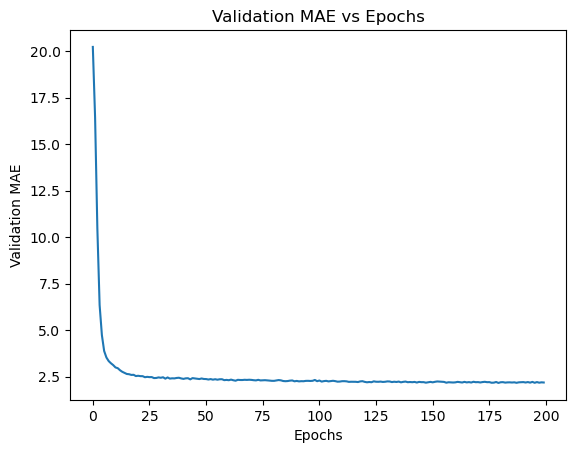

In [14]:
# Plot validation MAE vs epoch
plt.plot(np.mean(val_mae_per_epoch, axis = 0))
plt.title('Validation MAE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Based on the plot above, I would recommend early stopping! It seems that when there are more than 100 epochs, the model begins overfitting to the training data. The Validation MAE starts increasing around 100 epochs or so, meaning that that is when it begins overfitting, so the optimal number of epochs to use should be 100. 

In [20]:
# 10-fold Cross-Validation
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
val_mae_per_epoch = []

## creating a new model with 100 epochs
for train_idx, val_idx in kf.split(X_train_scaled):
    X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_cv, Y_val_cv = Y_train[train_idx], Y_train[val_idx]

    model_new_2a = create_nn_model()
    history_new_2a = model_new_2a.fit(x_train_cv, y_train_cv, 
                        validation_data = (x_val_cv, y_val_cv),
                        epochs = 100, 
                        batch_size = 16,
                        verbose = 0)
    
    # Append validation MAE per epoch
    val_mae_per_epoch.append(history_new_2a.history['val_loss'])

In [22]:
## reporting the final Validation MAE
final_val_mae = history_new_2a.history['val_loss'][-1]
print(f"Final Validation MAE: {final_val_mae}")

Final Validation MAE: 1.9886081218719482


### (b) Fit a neural network model with 1 hidden layer with 128 units. Report its validation MAE.

In [24]:
## defining model with 1 hidden layers with 128 hidden units and 100 epochs
def create_nn_model():
    model = Sequential()
    model.add(Input(shape = (X_train_scaled.shape[1],)))
    model.add(Dense(128, activation = 'relu')) # first hidden layer with 128 nodes
    model.add(Dense(1))  # output layer with no activation function (regression)
    model.compile(optimizer = 'adam', loss = 'mean_absolute_error')
    return model

In [26]:
for train_idx, val_idx in kf.split(X_train_scaled):
    x_train_cv, x_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_cv, y_val_cv = Y_train[train_idx], Y_train[val_idx]

    model_2b = create_nn_model()
    history_2b = model_2b.fit(x_train_cv, y_train_cv, 
                        validation_data = (x_val_cv, y_val_cv),
                        epochs = 100, 
                        batch_size = 16,
                        verbose = 0)
    
    # Append validation MAE per epoch
    val_mae_per_epoch.append(history_2b.history['val_loss'])

In [28]:
## reporting the final Validation MAE
final_val_mae_2b = history_2b.history['val_loss'][-1]
print(f"Final Validation MAE: {final_val_mae_2b}")

Final Validation MAE: 1.8489725589752197


### (c) Add L2 weight regularization to the model with 2 hidden layers, each with 64 hidden 
units. Report its validation MAE.

In [30]:
## defining model with 2 hidden layers, each with 64 hidden units, 100 epochs, and l2 = 0.0001
def create_nn_model():
    model = Sequential()
    model.add(Input(shape = (X_train_scaled.shape[1],)))
    model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.0001))) # first hidden layer with 64 nodes
    model.add(Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.0001)))
    model.add(Dense(1))  # output layer with no activation function (regression)
    model.compile(optimizer = 'adam', loss = 'mean_absolute_error')
    return model

In [32]:
for train_idx, val_idx in kf.split(X_train_scaled):
    x_train_cv, x_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_cv, y_val_cv = Y_train[train_idx], Y_train[val_idx]

    model_2c = create_nn_model()
    history_2c = model_2a.fit(x_train_cv, y_train_cv, 
                        validation_data = (x_val_cv, y_val_cv),
                        epochs = 100, 
                        batch_size = 16,
                        verbose = 0)
    
    # Append validation MAE per epoch
    val_mae_per_epoch.append(history_2c.history['val_loss'])

In [36]:
## reporting the final Validation MAE
final_val_mae_2c = history_2c.history['val_loss'][-1]
print(f"Final Validation MAE: {final_val_mae_2c}")

Final Validation MAE: 0.545735776424408


### (d) Add L2 weight regularization to the model with 1 hidden layer with 128 hidden units. 
Report its validation MAE.

In [39]:
## defining model with 1 hidden layer with 64 hidden units, 100 epochs, and l2 = 0.0001
def create_nn_model():
    model = Sequential()
    model.add(Input(shape = (X_train_scaled.shape[1],)))
    model.add(Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.0001))) # first hidden layer with 128 nodes
    model.add(Dense(1))  # output layer with no activation function (regression)
    model.compile(optimizer = 'adam', loss = 'mean_absolute_error')
    return model

In [41]:
for train_idx, val_idx in kf.split(X_train_scaled):
    x_train_cv, x_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_cv, y_val_cv = Y_train[train_idx], Y_train[val_idx]

    model_2d = create_nn_model()
    history_2d = model_2d.fit(x_train_cv, y_train_cv, 
                        validation_data = (x_val_cv, y_val_cv),
                        epochs = 100, 
                        batch_size = 16,
                        verbose = 0)
    
    # Append validation MAE per epoch
    val_mae_per_epoch.append(history_2d.history['val_loss'])

In [43]:
## reporting the final Validation MAE
final_val_mae_2d = history_2d.history['val_loss'][-1]
print(f"Final Validation MAE: {final_val_mae_2d}")

Final Validation MAE: 1.9397672414779663


### (e) Compare the above models. Which model would you recommend? Compute MAE of the recommended model from the test data. Comment on the results.

In [63]:
mae_comparison = {
    'Model': ['2 Hidden Layers, 64 units (new model)', '1 Hidden Layer, 128 units', 
              'L2 Regularization (2 Hidden Layers)', 'L2 Regularization (1 Hidden Layer)'],
    'Validation MAE': [final_val_mae, final_val_mae_2b, final_val_mae_2c, final_val_mae_2d]
}

mae_df = pd.DataFrame(mae_comparison)
mae_df.head()

,Model,Validation MAE
0,"2 Hidden Layers, 64 units (new model)",1.988608
1,"1 Hidden Layer, 128 units",1.848973
2,L2 Regularization (2 Hidden Layers),0.545736
3,L2 Regularization (1 Hidden Layer),1.939767


In [65]:
recommended_model = model_2c

recommended_model.fit(X_train, Y_train, epochs = 100, batch_size=16, verbose=0)
test_mae = recommended_model.evaluate(X_test_scaled, Y_test)/10
print("Test MAE for recommended model: ", test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.7896
Test MAE for recommended model:  1.9917770385742188


The model I would recommend is a neural network with 2 hidden layers, with 64 hidden units and l2 = 0.0001. When I ran this model, I ended up with a validation MAE of 0.5457, which was significantly lower than my other models. The test MAE for this model is 1.9918, which is higher than the validation MAE.

This increase suggests that the model may have encountered some degree of overfitting on the training and validation data, which may have impacted its performance on the new, unseen test data. Out of all 4 models I evaluated, this one performs the best.